In [1]:
from demo.displays import Demo2

## 1. Intro

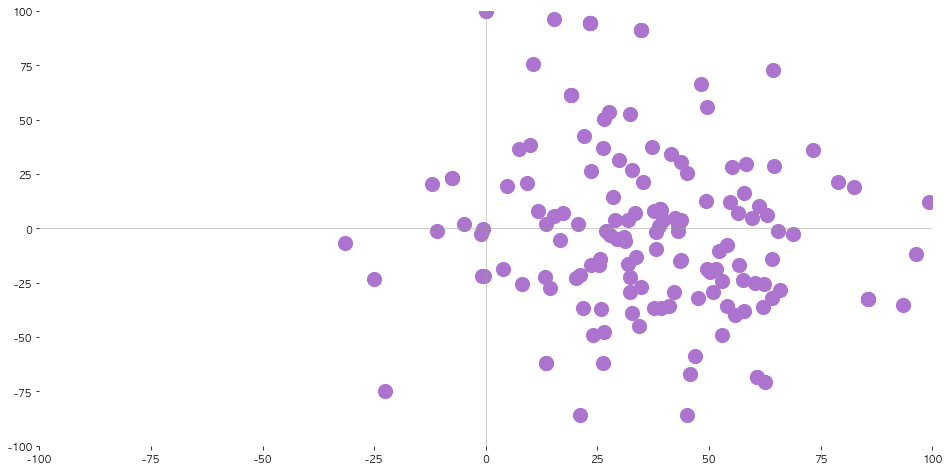

In [2]:
Demo2.pt1()

## 2. New Mailbox Map Making

### 우체통 지도가 완성되었습니다.

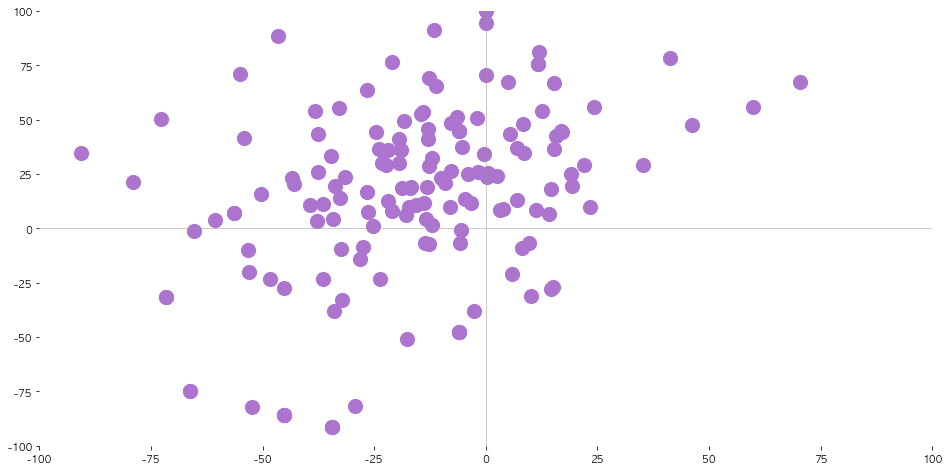

### 아래의 SeedZone Clustering 결과를 토대로 만들어졌어요.

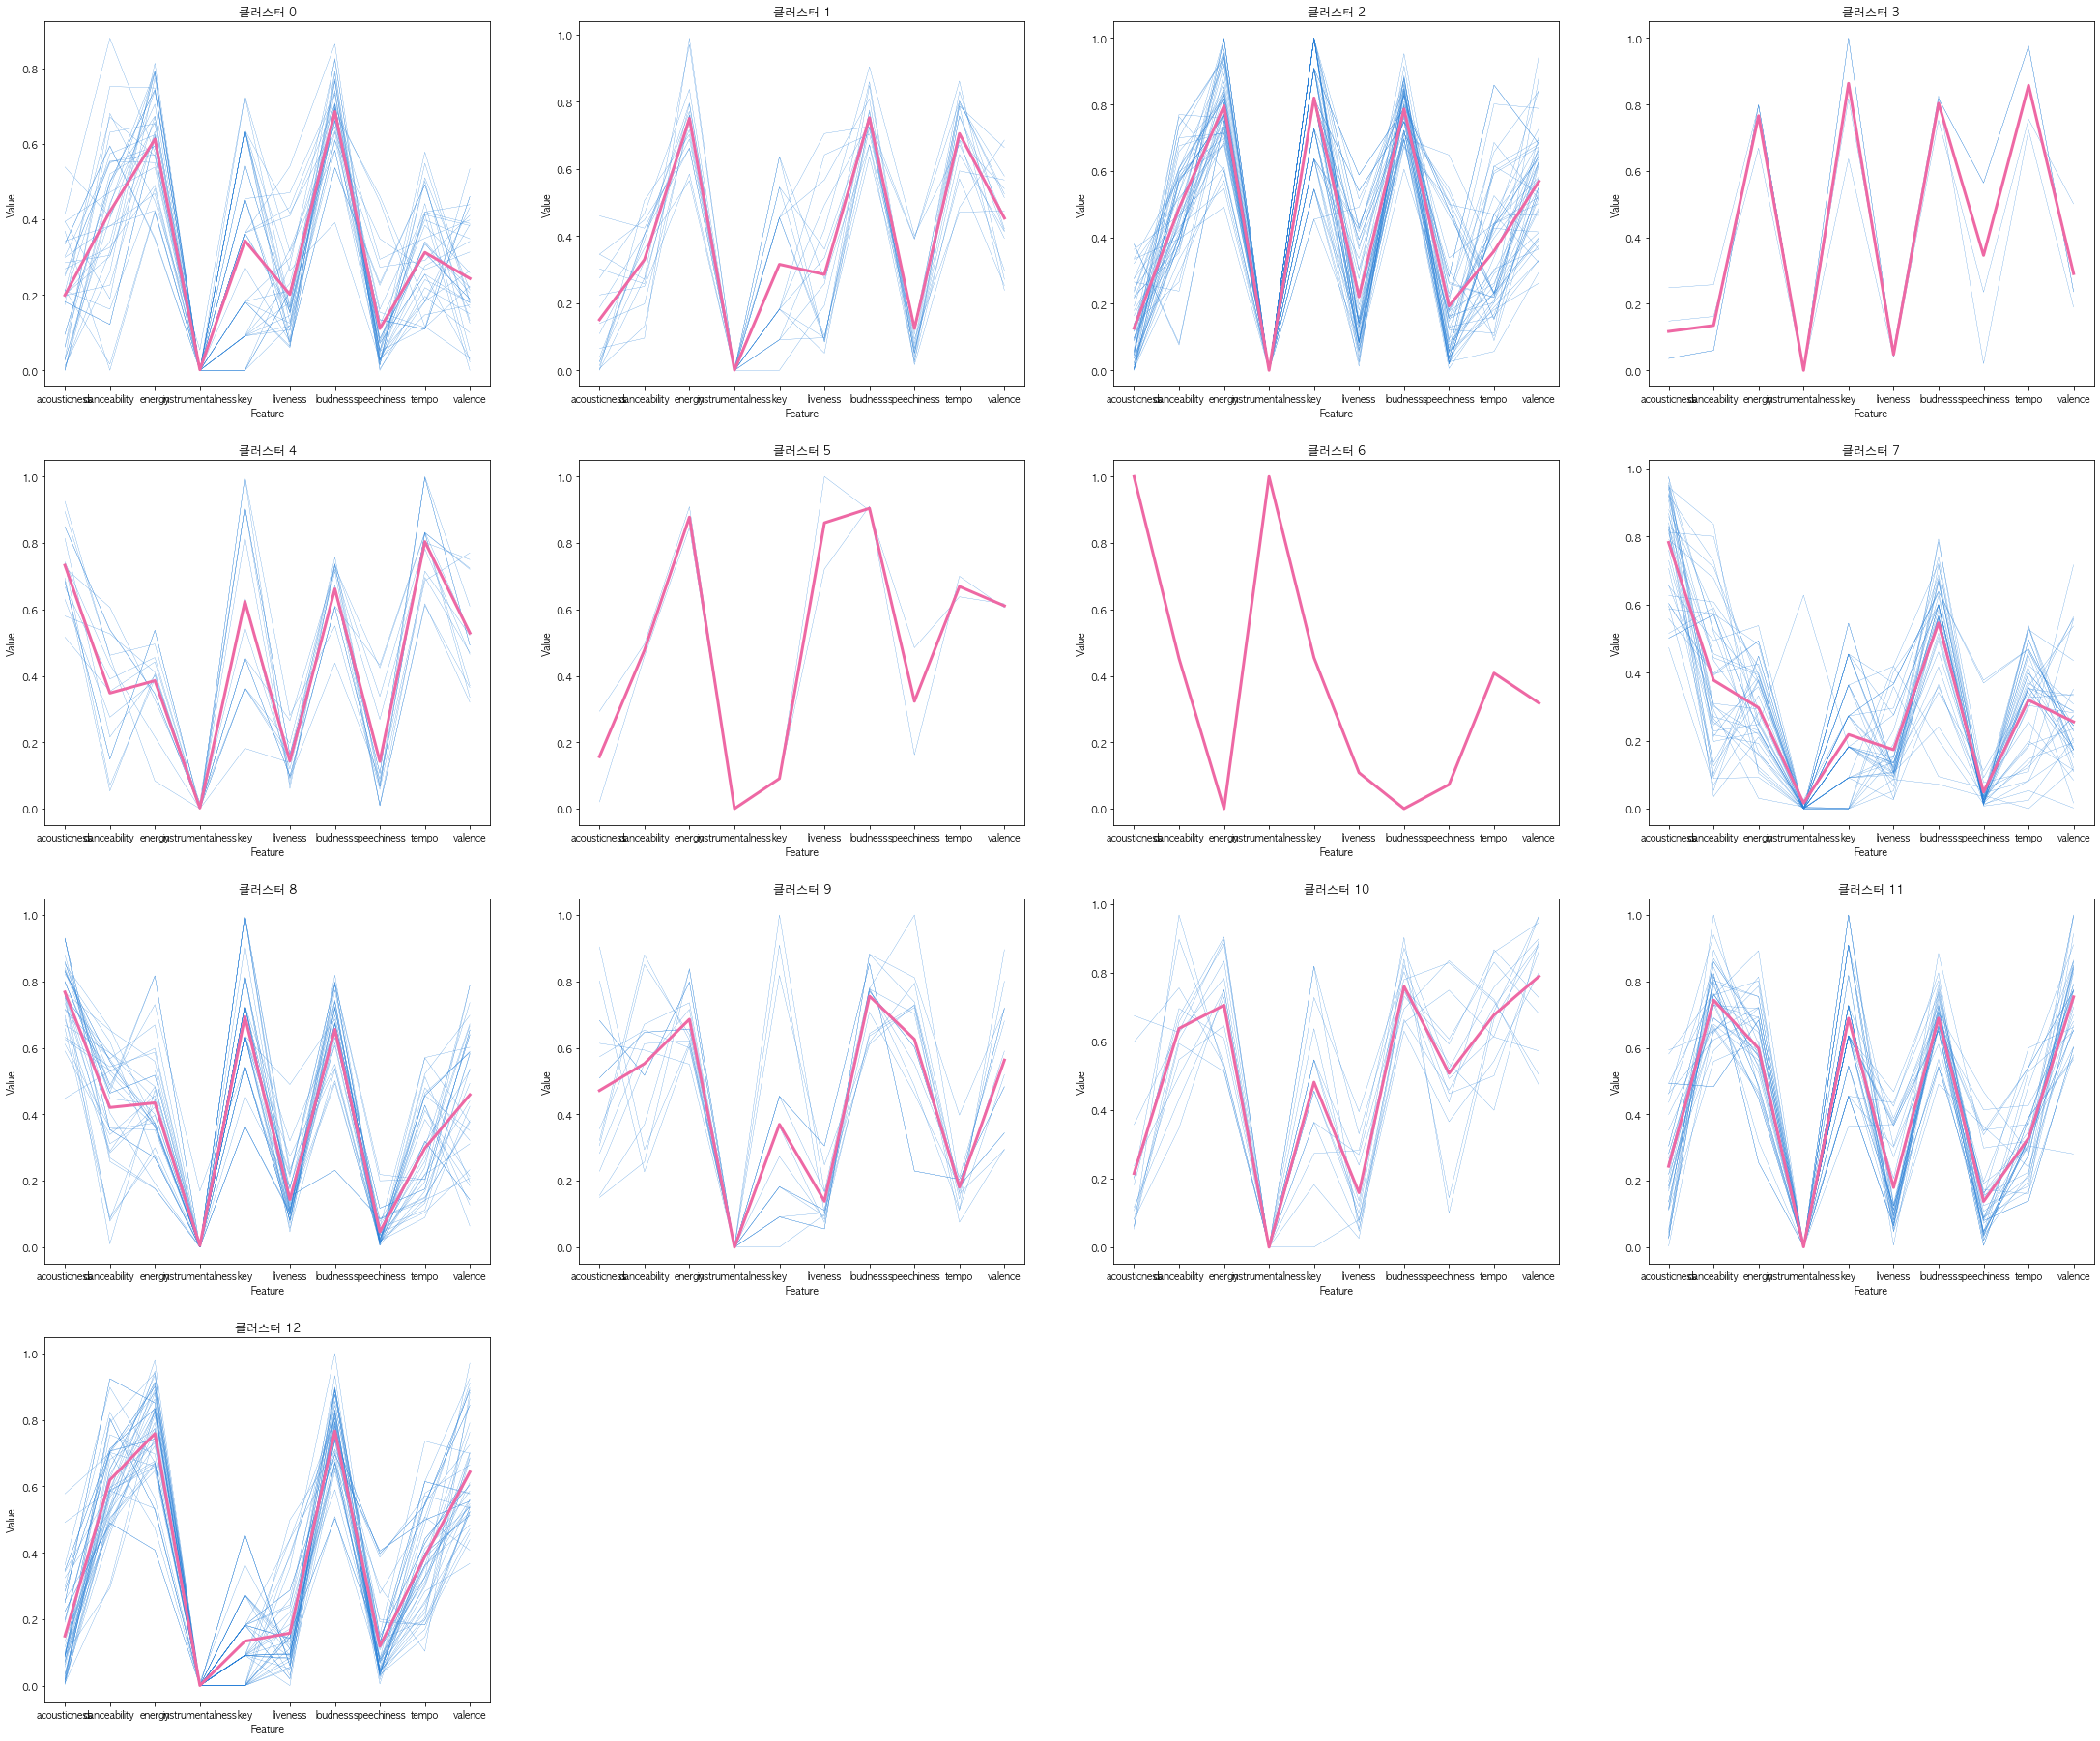

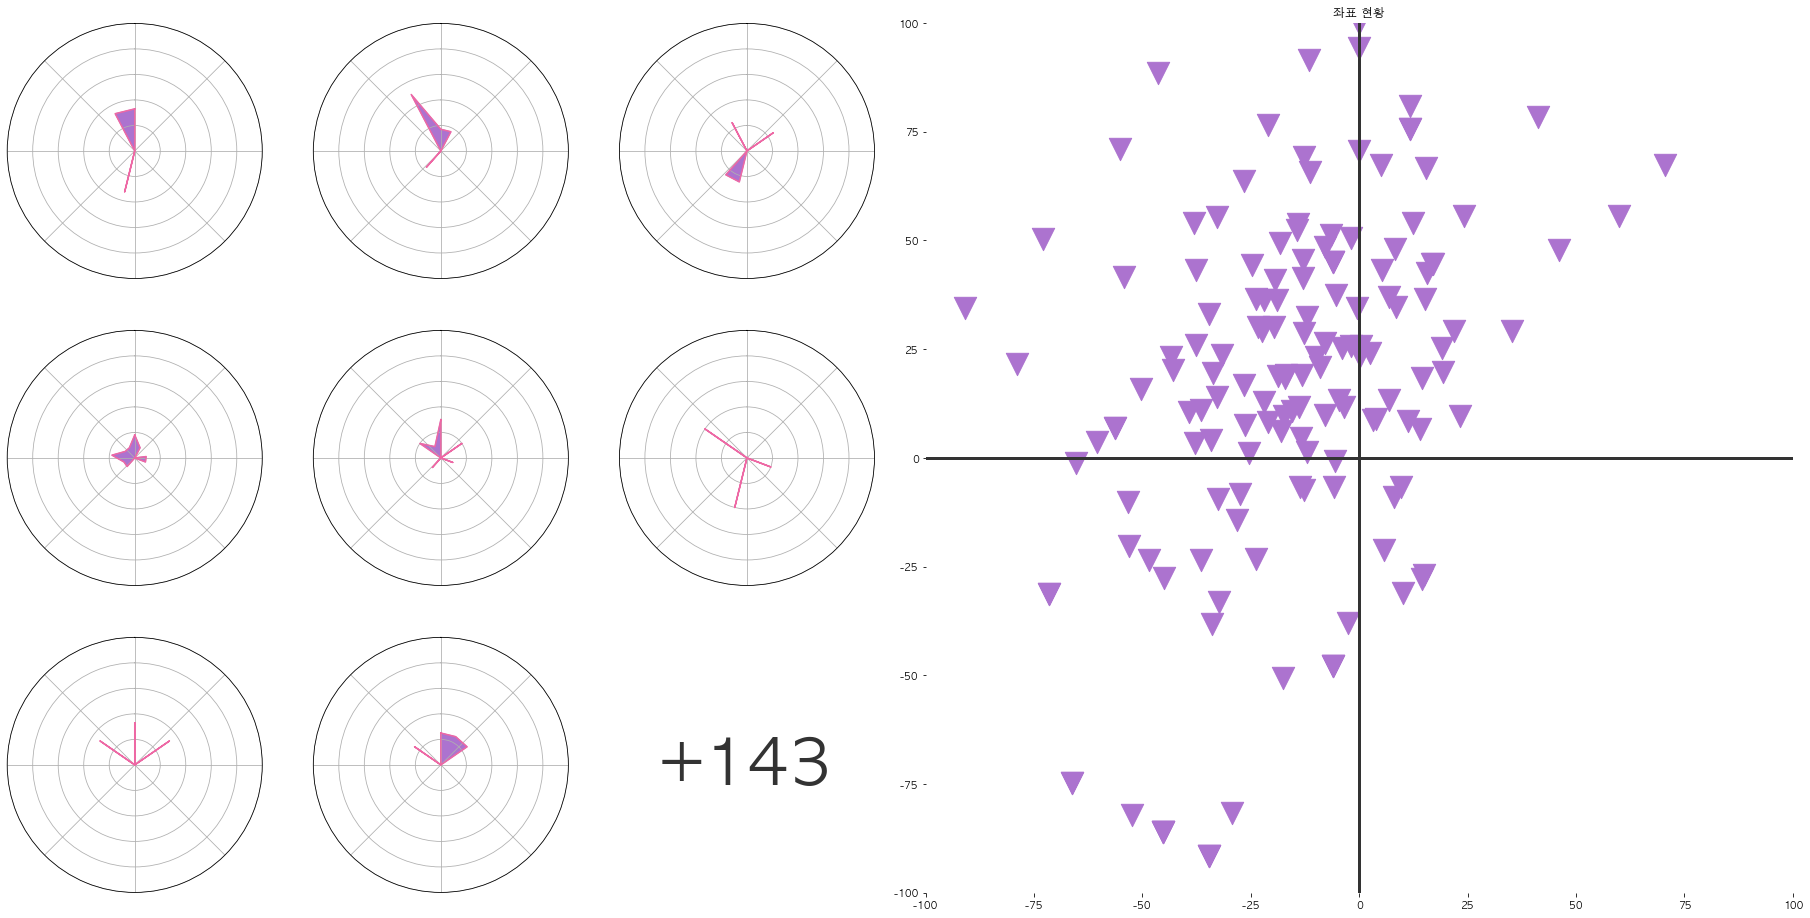

In [3]:
Demo2.pt2()

## 3. Radius Test

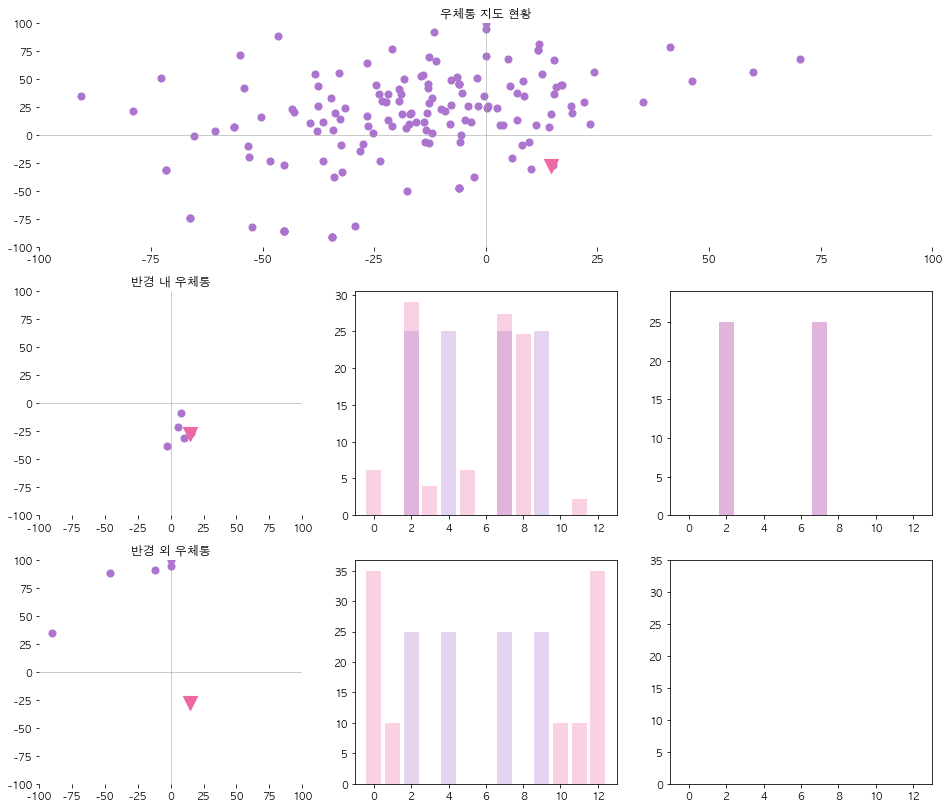

In [4]:
Demo2.pt3()